# Import Libraries


In [465]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns


# Load the Data

In [446]:
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Data Preparation

In [447]:
# Remove columns that are not informative to us for visualization
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# check the shape
df.shape

(195, 38)

In [448]:
# Rename some features so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [449]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)

False

In [450]:
df.columns = list(map(str, df.columns))
# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

In [451]:
# Set the country name as index useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [452]:
# Add total column
df['Total'] = df.sum(axis=1)
df.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Visualizing Top 5 countries by Area plots

In [453]:
years = list(map(str, range(1980, 2014)))
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
# Get the top 5 countries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0.5, 0, 'Years')

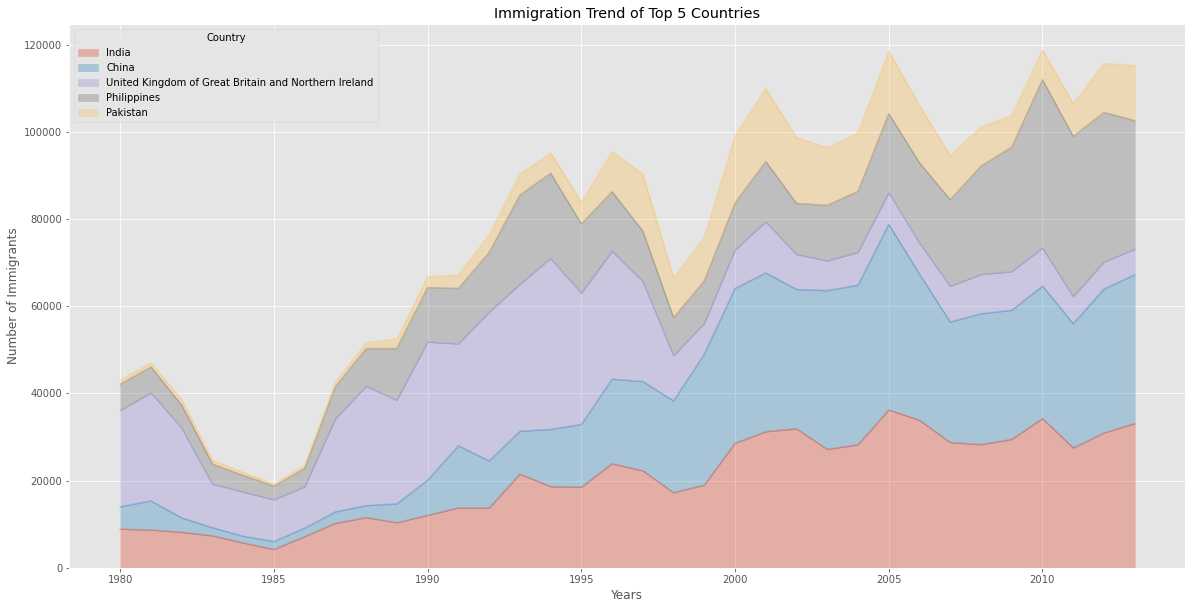

In [455]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Visualizing 3 random countries by Histogram

In [458]:
# Prepare the data
# Selecting another 3 countries to view them in a histogram plot
df_n3=df.loc[['Egypt','Greece','Iceland'],years].transpose()
# Let's view our data
df_n3.head()

Country,Egypt,Greece,Iceland
1980,612,1065,17
1981,660,953,33
1982,755,897,10
1983,455,633,9
1984,447,580,13


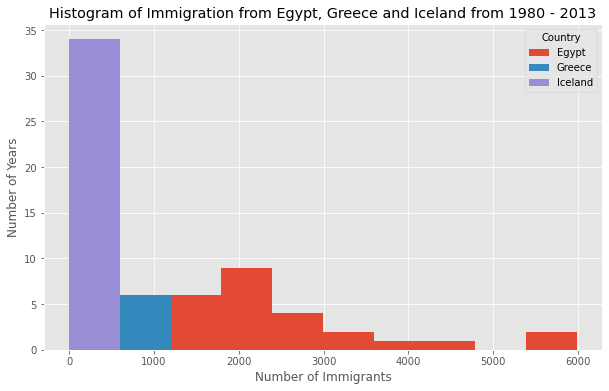

In [459]:
df_n3.plot(kind='hist', figsize=(10, 6))
plt.title('Histogram of Immigration from Egypt, Greece and Iceland from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

# Visualizing Developed/ing countries by Bar Charts

In [460]:
# Prepare the data
df_dev = df.groupby('DevName', axis=0).sum()
df_dev.drop(['Total'], axis=1, inplace=True)
df_dev=df_dev.transpose()
df_deved = df_dev['Developed regions']
df_deving = df_dev['Developing regions']

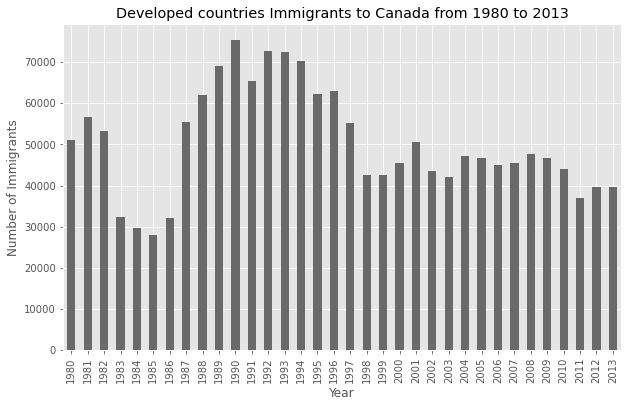

In [461]:
#Visualizing Developed countries
df_deved.plot(kind='bar', figsize=(10, 6), rot=90,color='dimgrey')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Developed countries Immigrants to Canada from 1980 to 2013')
# Annotate arrow
plt.annotate('',                      
             xy=(0, 0),             
             xytext=(0, 0),         
             xycoords='data',        
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
                             color='red', lw=1))
plt.annotate('',
             xy=(0, 0),rotation=302,va='bottom',ha='left')
plt.show()

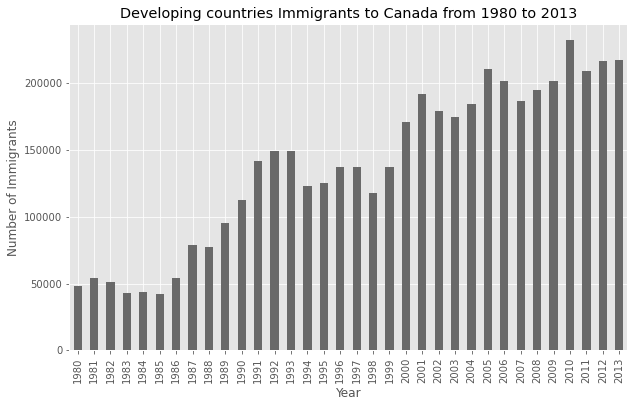

In [462]:
#Visualizing Developing countries
df_deving.plot(kind='bar', figsize=(10, 6), rot=90,color='dimgrey')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Developing countries Immigrants to Canada from 1980 to 2013')
# Annotate arrow
plt.annotate('',                      
             xy=(0, 0),             
             xytext=(0, 0),         
             xycoords='data',        
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
                             color='red', lw=1))
plt.annotate('',
             xy=(0, 0),rotation=302,va='bottom',ha='left')
plt.show()

# Visualizing Continents by Pie Chart

In [463]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


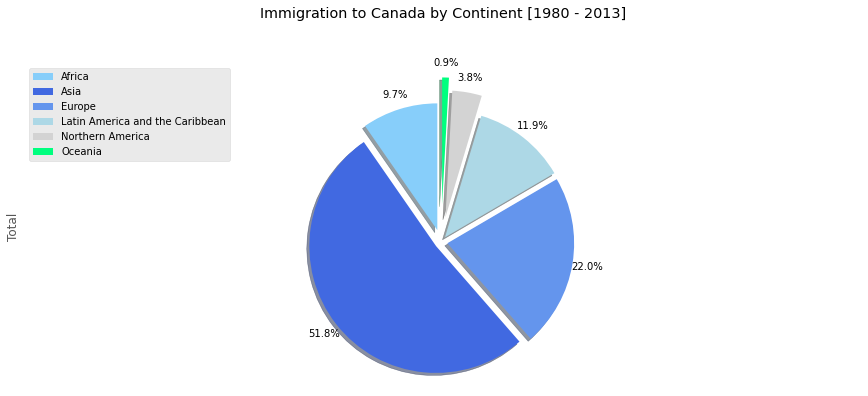

In [464]:
#Kindly find the below color list names:
# https://python-graph-gallery.com/python-colors/
colors_list = ['lightskyblue', 'royalblue', 'cornflowerblue', 'lightblue', 'lightgrey', 'springgreen']
explode_list = [0.1, 0.05, 0.05, 0.05, 0.2, 0.3] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn of labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()